安装visdom：
pip install visdom

启动服务器（可能在screen或者tmux中）：
python -m visdom.server

一旦启动服务器，您就可以通过在浏览器中输入 http://localhost:8097 访问Visdom，localhost可以换成您的托管地址。

If the above does not work, try using an SSH tunnel to your server by 把底下这一行加到本地的 ~/.ssh/config 中: 
LocalForward 127.0.0.1:8097 127.0.0.1:8097.


github：https://github.com/facebookresearch/visdom
翻译版：http://blog.csdn.net/u012436149/article/details/69389610?utm_source=gold_browser_extension

In [210]:
#visdom 学习笔记
import visdom
import numpy as np
viz = visdom.Visdom()
#画一个文本框
textwindow = viz.text('Hello, world!')

In [211]:
#画一张图 （CxHxW）
viz.image(np.ones((3, 10, 10)))
#画一张噪声图
viz.image(
    np.random.rand(3, 512, 256),
    opts=dict(title='噪点', caption='好噪啊。'),
)

'pane_355b05198b9f68'

In [14]:
y = np.random.rand(10)
print(y.mean())
print(y)
print(y + 1.5)
print((y+1.5).astype(int))
print((y+0.5).astype(int))
print(y.astype(int))

0.512266057299
[ 0.60410116  0.93877162  0.12651909  0.27891956  0.44199131  0.18390826
  0.95311346  0.74950646  0.23382479  0.61200487]
[ 2.10410116  2.43877162  1.62651909  1.77891956  1.94199131  1.68390826
  2.45311346  2.24950646  1.73382479  2.11200487]
[2 2 1 1 1 1 2 2 1 2]
[1 1 0 0 0 0 1 1 0 1]
[0 0 0 0 0 0 0 0 0 0]


In [126]:
Y = np.random.rand(100)
#2d散点图
viz.scatter(
    #样本点有100个2维样本
    X=np.random.rand(100, 2), 
    #100个样本的标签是Y（>1的整数）
    Y=(Y[Y > 0] + 1.5).astype(int),
    opts=dict(
        legend=['Apples', 'Pears'],
        xtickmin=-5,
        xtickmax=5,
        xtickstep=0.5,
        #横坐标从-5~5，格子跨度0.5
        ytickmin=-5,
        ytickmax=5,
        ytickstep=0.1,
        #纵坐标从-5~5，格子跨度1
        markersymbol='cross-thin-open',
        title='2d散点图',
    ),
)

'pane_3550d5e391beb2'

In [16]:
#3d散点图
viz.scatter(
    X=np.random.rand(100, 3),
    Y=(Y + 1.5).astype(int),
    opts=dict(
        legend=['Men', 'Women'],
        markersize=5,
        title='3d散点图',
    )
)

'pane_354dc34486202e'

In [17]:
# 2D scatterplot with custom intensities (red channel)
viz.scatter(
    X=np.random.rand(255, 2),
    Y=(np.random.rand(255) + 1.5).astype(int),
    opts=dict(
        markersize=10,
        #marker的颜色随机（0~255的随机数 大小为2x3）
        markercolor=np.random.randint(0, 255, (2, 3,)),
    ),
)
print(np.random.randint(0, 255, (2, 3,)))

[[141 180  79]
 [ 95 207 164]]


In [62]:
# 2D scatter plot with custom colors per label:
viz.scatter(
    X=np.random.rand(255, 2),
    Y=(np.random.randn(255) > 0) + 1,
    opts=dict(
        markersize=10,
        markercolor=np.floor(np.random.random((2, 3)) * 255),
    ),
)
print(np.floor(np.random.random((2, 3)) * 255))

[[ 170.    7.  134.]
 [ 223.   28.   19.]]


In [69]:
win = viz.scatter(
    X=np.random.rand(255, 2),
    opts=dict(
        markersize=10,
        markercolor=np.random.randint(0, 255, (255, 3,)),
    ),
)
print(np.random.randint(0, 255, (255, 3,)).shape)

(255, 3)


In [163]:
# add new trace to scatter plot
viz.updateTrace(
    X=np.random.rand(1),
    Y=np.random.rand(1),
    win=win,
    name='new_trace',
)

'pane_354b6dcec42788'

(179, 172, 3)


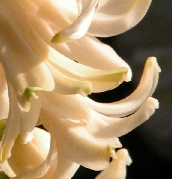

In [123]:
img = np.array(Image.open('/home/wcd/Projects/Pytorch-examples/fast_neural_style/images/yang/t2.bmp').convert('YCbCr'))
print(img.shape)
a = Image.fromarray(img[:,:,0],'L')
b = Image.fromarray(img[:,:,1],'L')
c = Image.fromarray(img[:,:,2],'L')
Image.merge('YCbCr',[a,b,c]).convert('RGB')

'pane_354b6ec9f32c1a'

In [11]:
# line plots
#一条随机取值线
viz.line(Y=np.random.rand(10))
#一条函数线
Y = np.linspace(-5, 5, 100)
viz.line(
    Y=np.column_stack((Y * Y, np.sqrt(Y + 5))),
    X=np.column_stack((Y, Y)),
    opts=dict(markers=False),
)

'pane_354dc3115579a6'

In [159]:
# line updates
win = viz.line(
    #一个column一条线
    #X：坐标轴 Y：取值
    #X=np.column_stack((np.arange(0, 10), np.arange(0, 10))),
    Y=np.column_stack((np.linspace(5, 10, 10), np.linspace(5, 10, 10) + 5)),
    opts=dict(title='线图'),
)

In [176]:
#第一种update方式：在原win窗口直接加点，然后连线，如果X比上一次的坐标要小，则出现一条右往左线段
viz.line(
    #must specify x-values for line update
    X=np.column_stack((np.arange(12, 22), np.arange(11, 21))),
    Y=np.column_stack((np.linspace(5, 10, 10), np.linspace(5, 10, 10) + 5)),
    #制定了update源是win这个pane
    win=win,
    update='append',
)

''

In [26]:
np.column_stack((np.arange(12, 22), np.arange(11, 21))).shape

(10, 2)

In [177]:
#第二种update方式：在x位置加上y值，连成线 最好一次一条线
viz.updateTrace(
    X=np.arange(21, 30),
    Y=np.arange(1, 10),
    win=win,
    name='2'
)
viz.updateTrace(
    X=np.arange(1, 10),
    Y=np.arange(11, 20),
    win=win,
    name='4'
)

'pane_354b6dcec42788'

In [ ]:
viz.updateTrace(
    X=np.arange(1, 10),
    Y=np.arange(11, 20),
    win=win,
    name='4'
)

In [130]:
Y = np.linspace(0, 4, 200)
win = viz.line(
    Y=np.column_stack((np.sqrt(Y), np.sqrt(Y) + 2)),
    X=np.column_stack((Y, Y)),
    opts=dict(
        fillarea=True,
        legend=False,
        width=400,
        height=400,
        xlabel='Time',
        ylabel='Volume',
        ytype='log',
        title='Stacked area plot',
        marginleft=30,
        marginright=30,
        marginbottom=80,
        margintop=30,
    ),
)

In [137]:
# bar plots
#普通条形图：像直方图
viz.bar(X=np.random.rand(20))
#叠起来的条形图
viz.bar(
    X=np.abs(np.random.rand(5, 3)),
    opts=dict(
        stacked=True,
        legend=['Facebook', 'Google', 'Twitter'],
        rownames=['2012', '2013', '2014', '2015', '2016']
    )
)
#分组的条形图
viz.bar(
    X=np.random.rand(20, 3),
    opts=dict(
        stacked=False,
        legend=['The Netherlands', 'France', 'United States']
    )
)

'pane_354b63cd8cc41c'

In [138]:
# histogram
viz.histogram(X=np.random.rand(10000), opts=dict(numbins=20))

# heatmap
viz.heatmap(
    X=np.outer(np.arange(1, 6), np.arange(1, 11)),
    opts=dict(
        columnnames=['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j'],
        rownames=['y1', 'y2', 'y3', 'y4', 'y5'],
        colormap='Electric',
    )
)

'pane_354b68a8c518e6'

In [133]:
# boxplot 统计量方框
X = np.random.rand(1000, 2)
#print(X)
X[:, 1] += 2
#print(X)
viz.boxplot(
    X=X,
    opts=dict(legend=['Men', 'Women'])
)

'pane_354b63496d6f76'

In [87]:
# contour 等高线
x = np.tile(np.arange(1, 101), (100, 1))
y = x.transpose()
X = np.exp((((x - 50) ** 2) + ((y - 50) ** 2)) / -(20.0 ** 2))
viz.contour(X=X, opts=dict(colormap='Viridis'))

In [28]:
import math
# stemplot
Y = np.linspace(0, 2 * math.pi, 70)
X = np.column_stack((np.sin(Y), np.cos(Y)))
win = viz.stem(
    X=X,
    Y=Y,
    opts=dict(legend=['Sine', 'Cosine'])
)

In [136]:
# surface 表面
viz.surf(X=X, opts=dict(colormap='Hot'))

In [33]:
import torch

In [42]:
from torch.autograd import Variable
import numpy as np
x=Variable(torch.Tensor(np.random.randn(1,1)))
m=x.mean()
print(x.data)
print(x.data[0])
print(x.data.numpy())
print(x.data[0].numpy())
#viz.line(Y=x.data.numpy())
viz=visdom.Visdom("wcd")
viz.line(
    X=np.ones(1),
         Y=x.data[0].numpy()
        )


 1.4335
[torch.FloatTensor of size 1x1]


 1.4335
[torch.FloatTensor of size 1]

[[ 1.43354642]]
[ 1.43354642]
Exception in user code:
------------------------------------------------------------


Traceback (most recent call last):
  File "/home/wcd/app/anaconda3/lib/python3.6/site-packages/visdom/__init__.py", line 228, in _send
    data=json.dumps(msg),
  File "/home/wcd/app/anaconda3/lib/python3.6/site-packages/requests/api.py", line 112, in post
    return request('post', url, data=data, json=json, **kwargs)
  File "/home/wcd/app/anaconda3/lib/python3.6/site-packages/requests/api.py", line 58, in request
    return session.request(method=method, url=url, **kwargs)
  File "/home/wcd/app/anaconda3/lib/python3.6/site-packages/requests/sessions.py", line 518, in request
    resp = self.send(prep, **send_kwargs)
  File "/home/wcd/app/anaconda3/lib/python3.6/site-packages/requests/sessions.py", line 633, in send
    adapter = self.get_adapter(url=request.url)
  File "/home/wcd/app/anaconda3/lib/python3.6/site-packages/requests/sessions.py", line 717, in get_adapter
    raise InvalidSchema("No connection adapters were found for '%s'" % url)
requests.exceptions.InvalidSchema: No con

False

In [29]:
from PIL import Image,ImageFilter
from torchvision import transforms
l = Image.open("/home/wcd/Projects/Pytorch-examples/fast_neural_style/images/style-images/flowers.bmp").convert('L')
img = Image.merge("RGB", (l, l, l))
transform = transforms.Compose([
        transforms.ToTensor(),
        transforms.Lambda(lambda x_HR: x_HR.mul(255))
    ])
imgtensor = transform(img)
viz.image(
        imgtensor,
        win=win,
        opts=dict(title='噪点', caption='好噪啊。'),
    )

'pane_354deb133b63ec'

In [83]:
viz=visdom.Visdom()
X=np.array([1])
Y=torch.ones(1).numpy()
print(X.shape)
print(Y.shape)
#X.ndim
viz.line(
    X=X,
    Y=Y,
    # 制定了update源是win这个pane
)

(1,)
(1,)


'pane_354df0de13fc10'

In [95]:
x = torch.ones(3,10,10)
y=x.repeat(1, 1,1,1)
y.squeeze(0)


(0 ,.,.) = 
   1   1   1   1   1   1   1   1   1   1
   1   1   1   1   1   1   1   1   1   1
   1   1   1   1   1   1   1   1   1   1
   1   1   1   1   1   1   1   1   1   1
   1   1   1   1   1   1   1   1   1   1
   1   1   1   1   1   1   1   1   1   1
   1   1   1   1   1   1   1   1   1   1
   1   1   1   1   1   1   1   1   1   1
   1   1   1   1   1   1   1   1   1   1
   1   1   1   1   1   1   1   1   1   1

(1 ,.,.) = 
   1   1   1   1   1   1   1   1   1   1
   1   1   1   1   1   1   1   1   1   1
   1   1   1   1   1   1   1   1   1   1
   1   1   1   1   1   1   1   1   1   1
   1   1   1   1   1   1   1   1   1   1
   1   1   1   1   1   1   1   1   1   1
   1   1   1   1   1   1   1   1   1   1
   1   1   1   1   1   1   1   1   1   1
   1   1   1   1   1   1   1   1   1   1
   1   1   1   1   1   1   1   1   1   1

(2 ,.,.) = 
   1   1   1   1   1   1   1   1   1   1
   1   1   1   1   1   1   1   1   1   1
   1   1   1   1   1   1   1   1   1   1
   1   1   1   1  

In [27]:
def drawloss(viz,loss_win,batch_id,loss):
    if loss_win is None:
        loss_win = viz.line(
            # X=np.column_stack((batch_id, batch_id, batch_id)),
            X=np.column_stack((batch_id, batch_id)),
            Y=np.column_stack(loss),
            opts=dict(
                markers=False,
                legend=['train','val'],
            ),
        )
    else:
        loss_win = viz.line(
            # must specify x_HR-values for line update
            X=np.column_stack((batch_id, batch_id)),
            Y=np.column_stack(loss),
            # 制定了update源是win这个pane
            win=loss_win,
            update='append',
            opts=dict(
                markers=False,
                legend=['train','val'],
            ),
        )
    return loss_win

In [31]:
import numpy as np
import visdom
viz=visdom.Visdom()
loss_win=None

In [33]:
loss_win = drawloss(viz,loss_win,3,(3.3,5.4))

In [15]:
np.array([[2.4],[3.6]])

array([[ 2.4],
       [ 3.6]])

In [16]:
np.array([2.4,3.6])

array([ 2.4,  3.6])

In [18]:
np.column_stack([2.4,3.6])

array([[ 2.4,  3.6]])

In [84]:
def normalize_batch(batch):
    # normalize using imagenet mean and std
    mean = batch.data.new(batch.data.size())
    std = batch.data.new(batch.data.size())
    mean[:, 0, :, :] = 0.485
    mean[:, 1, :, :] = 0.456
    mean[:, 2, :, :] = 0.406
    std[:, 0, :, :] = 0.229
    std[:, 1, :, :] = 0.224
    std[:, 2, :, :] = 0.225
    batch = torch.div(batch, 255.0)
    batch -= Variable(mean,volatile=False)
    batch /= Variable(std,volatile=False)
    return batch

def unnormalize_batch(batch):
    mean = batch.data.new(batch.data.size())
    std = batch.data.new(batch.data.size())
    mean[:, 0, :, :] = 0.485
    mean[:, 1, :, :] = 0.456
    mean[:, 2, :, :] = 0.406
    std[:, 0, :, :] = 0.229
    std[:, 1, :, :] = 0.224
    std[:, 2, :, :] = 0.225
    batch = torch.mul(batch,Variable(std,volatile=False))
    batch += Variable(mean,volatile=False)
    batch = torch.mul(batch, 255.0)
    return batch

In [85]:
from torch.autograd import Variable
import torch

In [86]:
tensor = torch.from_numpy(np.random.rand(2,3,5,5))
tensor = tensor.mul_(255).clamp(0,255)
print(tensor)


(0 ,0 ,.,.) = 
    2.0779   47.6759  190.6345    0.9314  226.2337
    6.2567  145.3788   57.1076  225.9117  109.2014
   13.2068  152.6277  254.2607   55.8901  247.2454
   32.0003  186.8842  198.0192  242.5145   61.1224
    7.5287  237.7457   70.0256  210.2827  217.4348

(0 ,1 ,.,.) = 
   36.4514   77.7869  119.4885  207.5423  101.5247
  132.3009  199.4741  168.2337  105.7931  182.5061
  164.2111  134.4607  149.5943   95.4859  144.8827
   64.6207  125.9190  130.2956  196.8034  252.6364
  150.3248  120.8929  209.0081  238.0145  108.3137

(0 ,2 ,.,.) = 
   38.1388  229.9694  223.1063   24.6402   44.6779
  239.4239  124.7212   96.9304   88.8388   46.4283
  196.5571  137.0803  244.6040   38.2120  206.2294
  107.2269  237.1397  168.3590  199.1640   58.2944
   82.8790  119.7624   66.9355   86.7706   25.9304

(1 ,0 ,.,.) = 
   93.3588  131.4854   90.8282  114.2047  200.5704
   92.2628    6.2610  102.4176   44.0873   55.8944
   25.0284  134.9338   96.5139   24.3092    6.8074
   90.2403  148.53

In [87]:
vt = Variable(tensor,requires_grad = True)
norm = normalize_batch(vt)
print(norm)

Variable containing:
(0 ,0 ,.,.) = 
 -2.0823 -1.3015  1.1467 -2.1020  1.7563
 -2.0108  0.3717 -1.1400  1.7508 -0.2479
 -1.8917  0.4958  2.2362 -1.1608  2.1161
 -1.5699  1.0824  1.2731  2.0351 -1.0712
 -1.9890  1.9534 -0.9187  1.4831  1.6056

(0 ,1 ,.,.) = 
 -1.3976 -0.6739  0.0562  1.5977 -0.2583
  0.2805  1.4565  0.9096 -0.1836  1.1594
  0.8391  0.3183  0.5832 -0.3640  0.5007
 -0.9044  0.1687  0.2454  1.4097  2.3872
  0.5960  0.0808  1.6234  2.1312 -0.1395

(0 ,2 ,.,.) = 
 -1.1397  2.2037  2.0841 -1.3750 -1.0257
  2.3685  0.3693 -0.1150 -0.2561 -0.9952
  1.6214  0.5848  2.4588 -1.1384  1.7900
  0.0644  2.3287  1.1299  1.6668 -0.7884
 -0.3599  0.2829 -0.6378 -0.2921 -1.3525

(1 ,0 ,.,.) = 
 -0.5192  0.1338 -0.5625 -0.1622  1.3168
 -0.5379 -2.0107 -0.3640 -1.3629 -1.1607
 -1.6893  0.1928 -0.4651 -1.7016 -2.0013
 -0.5726  0.4258 -0.4776 -1.4552 -1.5040
  1.7446 -0.2440 -0.3725  0.6850  0.3993

(1 ,1 ,.,.) = 
  2.1878 -0.0752 -0.9234  1.1271 -2.0017
  0.6762 -0.3678 -0.4065  1.1566  0.923

In [88]:
unorm = unnormalize_batch(norm)
print(unorm)

Variable containing:
(0 ,0 ,.,.) = 
    2.0779   47.6759  190.6345    0.9314  226.2337
    6.2567  145.3788   57.1076  225.9117  109.2014
   13.2068  152.6277  254.2607   55.8901  247.2454
   32.0003  186.8842  198.0192  242.5145   61.1224
    7.5287  237.7457   70.0256  210.2827  217.4348

(0 ,1 ,.,.) = 
   36.4514   77.7869  119.4885  207.5423  101.5247
  132.3009  199.4741  168.2337  105.7931  182.5061
  164.2111  134.4607  149.5943   95.4859  144.8827
   64.6207  125.9190  130.2956  196.8034  252.6364
  150.3248  120.8929  209.0081  238.0145  108.3137

(0 ,2 ,.,.) = 
   38.1388  229.9694  223.1063   24.6402   44.6779
  239.4239  124.7212   96.9304   88.8388   46.4283
  196.5571  137.0803  244.6040   38.2120  206.2294
  107.2269  237.1397  168.3590  199.1640   58.2944
   82.8790  119.7624   66.9355   86.7706   25.9304

(1 ,0 ,.,.) = 
   93.3588  131.4854   90.8282  114.2047  200.5704
   92.2628    6.2610  102.4176   44.0873   55.8944
   25.0284  134.9338   96.5139   24.3092    6.807

In [89]:
torch.add(vt,-1*unorm)

Variable containing:
(0 ,0 ,.,.) = 
1.00000e-14 *
  -1.3767  0.0000  0.0000 -1.4100  0.0000
   0.0000  0.0000  0.0000  0.0000  0.0000
   0.0000  0.0000  0.0000  0.0000  0.0000
   0.0000  0.0000  0.0000  0.0000  0.0000
   0.0000  0.0000  0.0000  0.0000  0.0000

(0 ,1 ,.,.) = 
1.00000e-14 *
   0.0000  0.0000  0.0000  0.0000  0.0000
   0.0000  0.0000  0.0000  0.0000  0.0000
   0.0000  0.0000  0.0000  0.0000  0.0000
   0.0000  0.0000  0.0000  0.0000  0.0000
   0.0000  0.0000  0.0000  0.0000  0.0000

(0 ,2 ,.,.) = 
1.00000e-14 *
   0.0000  0.0000 -2.8422  0.0000 -0.7105
   0.0000  0.0000  0.0000  0.0000  0.0000
   0.0000  0.0000  0.0000  0.0000  0.0000
   0.0000  0.0000  0.0000  0.0000  0.0000
   0.0000  0.0000  0.0000  0.0000  0.0000

(1 ,0 ,.,.) = 
1.00000e-14 *
   0.0000  0.0000  0.0000  0.0000  0.0000
   0.0000 -1.4211  0.0000  0.0000  0.0000
   0.0000  0.0000  0.0000  0.0000 -1.4211
   0.0000  0.0000  0.0000  0.0000  0.0000
   0.0000  0.0000  0.0000  0.0000  0.0000

(1 ,1 ,.,.) = 
1.00

In [163]:
import torch
import torch.nn.init

class TransformerNet(torch.nn.Module):
    def __init__(self, mode='RGB'):
        super(TransformerNet, self).__init__()
        if mode is 'Y' :
            channel = 1
        else :
            channel = 3
        # Initial convolution layers
        self.conv1 = ConvLayer(channel, 32, kernel_size=9, stride=1)
        self.in1 = torch.nn.InstanceNorm2d(32, affine=True)
        self.conv2 = ConvLayer(32, 64, kernel_size=3, stride=2)
        self.in2 = torch.nn.InstanceNorm2d(64, affine=True)
        self.conv3 = ConvLayer(64, 128, kernel_size=3, stride=2)
        self.in3 = torch.nn.InstanceNorm2d(128, affine=True)
        # Residual layers
        self.res1 = ResidualBlock(128)
        self.res2 = ResidualBlock(128)
        self.res3 = ResidualBlock(128)
        self.res4 = ResidualBlock(128)
        self.res5 = ResidualBlock(128)
        # Conv+PS upsampling Layers
        self.ps1 = ConvPSLayer(128, 64, kernel_size=3, stride=1, upsample=2)
        self.in4 = torch.nn.InstanceNorm2d(64, affine=True)
        self.ps2 = ConvPSLayer(64, 32, kernel_size=3, stride=1, upsample=2)
        self.in5 = torch.nn.InstanceNorm2d(32, affine=True)
        self.conv4 = ConvLayer(32, channel, kernel_size=3, stride=1)
        # Non-linearities
        self.relu = torch.nn.ReLU()


    def forward(self, X):
        y = self.relu(self.in1(self.conv1(X)))
        y = self.relu(self.in2(self.conv2(y)))
        y = self.relu(self.in3(self.conv3(y)))
        y = self.res1(y)
        y = self.res2(y)
        y = self.res3(y)
        y = self.res4(y)
        y = self.res5(y)
        y = self.relu(self.in4(self.ps1(y)))
        y = self.relu(self.in5(self.ps2(y)))
        y = self.conv4(y)
        #y += X
        return y


class ConvLayer(torch.nn.Module):
    def __init__(self, in_channels, out_channels, kernel_size, stride):
        super(ConvLayer, self).__init__()
        reflection_padding = kernel_size // 2
        self.reflection_pad = torch.nn.ReflectionPad2d(reflection_padding)
        self.conv2d = torch.nn.Conv2d(in_channels, out_channels, kernel_size, stride)


    def forward(self, x):
        #out = self.reflection_pad(x)
        out = self.conv2d(x)
        return out


class ResidualBlock(torch.nn.Module):
    """ResidualBlock
    introduced in: https://arxiv.org/abs/1512.03385
    recommended architecture: http://torch.ch/blog/2016/02/04/resnets.html
    """

    def __init__(self, channels):
        super(ResidualBlock, self).__init__()
        self.conv1 = ConvLayer(channels, channels, kernel_size=3, stride=1)
        self.in1 = torch.nn.InstanceNorm2d(channels, affine=True)
        self.conv2 = ConvLayer(channels, channels, kernel_size=3, stride=1)
        self.in2 = torch.nn.InstanceNorm2d(channels, affine=True)
        self.relu = torch.nn.ReLU()

    def forward(self, x):
        residual = x
        out = self.relu(self.in1(self.conv1(x)))
        out = self.in2(self.conv2(out))
        out = out + residual
        return out


class UpsampleConvLayer(torch.nn.Module):
    """UpsampleConvLayer
    Upsamples the input and then does a convolution. This method gives better results
    compared to ConvTranspose2d.
    ref: http://distill.pub/2016/deconv-checkerboard/
    """

    def __init__(self, in_channels, out_channels, kernel_size, stride, upsample=None):
        super(UpsampleConvLayer, self).__init__()
        self.upsample = upsample
        if upsample:
            self.upsample_layer = torch.nn.UpsamplingNearest2d(scale_factor=upsample)
        reflection_padding = kernel_size // 2
        self.reflection_pad = torch.nn.ReflectionPad2d(reflection_padding)
        self.conv2d = torch.nn.Conv2d(in_channels, out_channels, kernel_size, stride)

    def forward(self, x):
        x_in = x
        if self.upsample:
            x_in = self.upsample_layer(x_in)
        #out = self.reflection_pad(x_in)
        out = self.conv2d(x_in)
        return out


class ConvPSLayer(torch.nn.Module):
    """
    conv of (in,outxuxu,k,s)
    follow by
    pixel shuffle of scalling factor (u)
    output is (bs out hxu wxu)
    """

    def __init__(self, in_channels, out_channels, kernel_size, stride, upsample=None):
        super(ConvPSLayer, self).__init__()
        self.upsample = upsample
        if upsample:
            self.pixelshuffle_layer = torch.nn.PixelShuffle(upsample)
        reflection_padding = kernel_size // 2
        self.reflection_pad = torch.nn.ReflectionPad2d(reflection_padding)
        self.conv2d = torch.nn.Conv2d(in_channels, out_channels*(upsample**2), kernel_size, stride)

    def forward(self, x):

        #out = self.reflection_pad(x)
        out = self.conv2d(x)
        if self.upsample:
            out = self.pixelshuffle_layer(out)
        return out

In [160]:
up = UpsampleConvLayer(4, 4, 3, 1, upsample=2).cuda()
sp = ConvPSLayer(4, 4, 3, 1, upsample=2).cuda()
cv = ConvLayer(4, 4, kernel_size=3, stride=1).cuda()

In [161]:
v = Variable(torch.from_numpy(np.random.rand(2,4,10,10))).cuda()

In [164]:
div2 = cv(cv(v))
print(div2.size())
print(up(up(div2)).size())

print(str(v.size())+"conv: "+str(cv(v).size()))

torch.Size([2, 4, 6, 6])
torch.Size([2, 4, 18, 18])
torch.Size([2, 4, 10, 10])conv: torch.Size([2, 4, 8, 8])


197

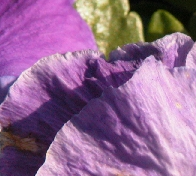

128.0
64.0


ModuleList (
  (0): UpsampleConvLayer (
    (upsample_layer): UpsamplingNearest2d(scale_factor=2)
    (reflection_pad): ReflectionPad2d (1, 1, 1, 1)
    (conv2d): Conv2d(4, 4, kernel_size=(3, 3), stride=(1, 1))
  )
)

In [230]:
import numpy as np
num=set([0,1,4,2])
print(3 in num)

False


In [231]:
blocknum1 = 12

In [233]:
for latter in range(blocknum1//2,blocknum1,1):
    former = blocknum1-1-latter
    if former in num and former is not latter:
        print(str(former)+":"+str(latter))

4:7
2:9
1:10
0:11
